Extracting the data

In [1]:
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np

In [ ]:
stocks_symbols = ["TSLA"
#, "MSFT", "GOOG",
#                   "ARKR", "ASH", "ASIX",
#                   "ASM", "ASO", "ASPI", "ASR"
                  ]

df_list = []

for stock in stocks_symbols:
  df1 = yf.download(stock, start = '2021-01-01',
                    end = '2023-01-01',
                    progress = False)



  df_list.append(df1)


df_list

[                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-01-04  239.820007  248.163330  239.063339  243.256668  243.256668   
 2021-01-05  241.220001  246.946671  239.733337  245.036667  245.036667   
 2021-01-06  252.830002  258.000000  249.699997  251.993332  251.993332   
 2021-01-07  259.209991  272.329987  258.399994  272.013336  272.013336   
 2021-01-08  285.333344  294.829987  279.463318  293.339996  293.339996   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  126.370003  128.619995  121.019997  123.150002  123.150002   
 2022-12-27  117.500000  119.669998  108.760002  109.099998  109.099998   
 2022-12-28  110.349998  116.269997  108.239998  112.709999  112.709999   
 2022-12-29  120.389999  123.570000  117.500000  121.820000  121.820000   
 2022-12-30  119.949997  124.480003  119.750000  123.180000  123.180000   
 
                Volume 

Making the signal column

In [ ]:
#We begin with making the changes column for the close price

def make_changes(close):
  changes = np.zeros_like(close)

  for i in range(len(close)):
    if i==0:
      continue
    else:
      diff = ((close[i] - close[i-1])/close[i-1])*100
      changes[i] = diff

  return changes

In [ ]:
#Now we will start to make the signals

def signal_generator(changes, window,p=10.00):
  signals = []

  for i in range(len(changes)):
    if len([x for x in changes[i+window:i+1:-1] if x>=p])>0:
      signals.append("YES")
    else:
      signals.append("NO")

  return signals

In [ ]:
def signal_generator_new(opening, window, p = 10.00):
  signals = []

  for i in range(len(opening)-window):
    x1 = opening[i]
    x2 = opening[i+window]
    ch = ((x2-x1)/x1)*100
    if ch >= p:
      signals.append("YES")
    else:
      signals.append("NO")

  length = len(opening) - len(signals)

  for x in range(length):
    signals.append("NA")
  return signals

Testing the code on a sample dataset

In [ ]:
import random

data = []

for i in range(80):
  x = random.uniform(1,25)
  data.append(x)

signals = signal_generator(data,5)

series_data = {
    'Data':data,
    'Signals':signals
}

df_test = pd.DataFrame(series_data)

df_test.head()

,Data,Signals
0,16.165419,YES
1,8.718682,YES
2,24.950614,YES
3,5.267291,YES
4,1.831201,YES


Let us visualise the sample

<Axes: >

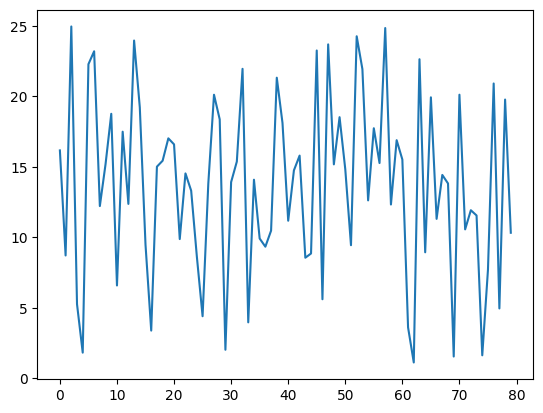

In [ ]:
import matplotlib.pyplot as plt

df_test['Data'].plot()

In [ ]:
df_test.head(20)

,Data,Signals
0,16.165419,YES
1,8.718682,YES
2,24.950614,YES
3,5.267291,YES
4,1.831201,YES
5,22.277463,YES
6,23.193192,YES
7,12.220980,YES
8,15.195432,YES
9,18.761355,YES


In [ ]:
df_list[0].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [ ]:
for df in df_list:
  df['Changes'] = make_changes(df['Close'])
  df['Signal'] = signal_generator(df['Changes'], 20)

df_list[0].head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,NO
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO


In [ ]:
df_con = df_list[0]
df_con.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,NO
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO


In [ ]:
df_con['Signal_Corrected'] = signal_generator_new(df['Open'], 20, 20)
df_con.head(60)

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal,Signal_Corrected
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,NO,YES
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,NO
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,-7.821412,NO,NO
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,138812100,4.715295,NO,NO
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,99937500,0.585095,NO,NO
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,93798900,-1.101352,NO,NO


In [ ]:
df_YES = df_con[df_con['Signal_Corrected'] == 'YES']

df_YES.head(20)

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal,Signal_Corrected
Date,,,,,,,,,
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,NO,YES
2021-09-24,248.630005,258.266663,248.186661,258.130005,258.130005,64119000,2.753306,NO,YES
2021-09-27,257.706665,266.333344,256.436676,263.786682,263.786682,84212100,2.191406,YES,YES
2021-09-28,262.399994,265.213318,255.393326,259.186676,259.186676,76144200,-1.743836,YES,YES
2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700,0.482278,YES,YES
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,-0.746181,YES,YES
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,-0.033529,YES,YES
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.813962,YES,YES
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,-0.120285,YES,YES


In [ ]:
df_YES.shape

(51, 9)

In [ ]:
df_con.shape

(503, 9)

Text(0, 0.5, 'Open')

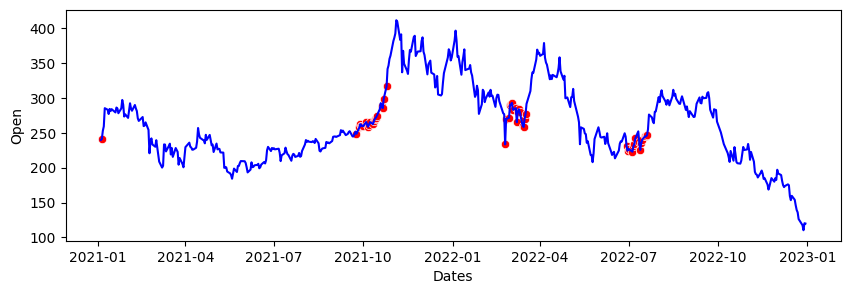

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,3))
sns.lineplot(x = df_con.index, y = df_con.Open, color = 'blue')
sns.scatterplot(x = df_YES.index, y = df_YES.Open, color = 'red')
plt.xlabel("Dates")
plt.ylabel("Open")

In [ ]:
df_con.drop('Signal', axis = 1, inplace = True)
df_con.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO


In [ ]:
df_con.shape

(503, 8)

In [ ]:
x = df_con['Signal_Corrected'].value_counts()
x

Signal_Corrected
NO     432
YES     51
NA      20
Name: count, dtype: int64

In [ ]:
df_con_new = df_con[:-20]

df_con_new['Signal_Corrected'].value_counts()

Signal_Corrected
NO     432
YES     51
Name: count, dtype: int64

In [ ]:
df_con_new.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO


In [ ]:
df_con_new['VWAP2'] = ((df_con_new['Open'] + df_con_new['Close'])*2+(df_con_new['High'] + df_con_new['Low']))/6.0
df_con_new.head()

<ipython-input-405-2a6cc13f4dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['VWAP2'] = ((df_con_new['Open'] + df_con_new['Close'])*2+(df_con_new['High'] + df_con_new['Low']))/6.0


,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664


In [ ]:
def rolling_vwap(vwap, window_size):
  result = np.zeros_like(vwap)

  for i in range(len(vwap)):
    if i<window_size:
      continue
    else:
      answer = vwap[(i-window_size):i]
      ans = np.mean(answer)

      result[i] = ans

  return result

In [ ]:
small = np.zeros(10)

for x in range(len(small)):
  small[x] = np.random.randint(1,6)

small

array([2., 1., 3., 1., 2., 4., 5., 5., 2., 2.])

In [ ]:
rolling_vwap(small, 3)

array([0.        , 0.        , 0.        , 2.        , 1.66666667,
       2.        , 2.33333333, 3.66666667, 4.66666667, 4.        ])

In [ ]:
df_con_new['Rolling VWAP 5'] = rolling_vwap(df_con_new['VWAP2'], 5)

df_con_new.head(10)

<ipython-input-409-b166b39c3c01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['Rolling VWAP 5'] = rolling_vwap(df_con_new['VWAP2'], 5)


,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5
Date,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003,0.000000
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891,0.000000
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111,0.000000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439,0.000000
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664,0.000000
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,-7.821412,NO,276.623886,258.491222
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,138812100,4.715295,NO,280.901113,265.369998
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,99937500,0.585095,NO,283.711670,272.910443
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,93798900,-1.101352,NO,282.140554,279.074554


In [ ]:
df_con_new['Rolling VWAP 10'] = rolling_vwap(df_con_new['VWAP2'], 10)
df_con_new['Rolling VWAP 20'] = rolling_vwap(df_con_new['VWAP2'], 20)

df_con_new.head(20)

<ipython-input-410-885748fb1dc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['Rolling VWAP 10'] = rolling_vwap(df_con_new['VWAP2'], 10)
<ipython-input-410-885748fb1dc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['Rolling VWAP 20'] = rolling_vwap(df_con_new['VWAP2'], 20)


,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5,Rolling VWAP 10,Rolling VWAP 20
Date,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003,0.000000,0.000000,0.0
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891,0.000000,0.000000,0.0
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111,0.000000,0.000000,0.0
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439,0.000000,0.000000,0.0
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664,0.000000,0.000000,0.0
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,-7.821412,NO,276.623886,258.491222,0.000000,0.0
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,138812100,4.715295,NO,280.901113,265.369998,0.000000,0.0
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,99937500,0.585095,NO,283.711670,272.910443,0.000000,0.0
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,93798900,-1.101352,NO,282.140554,279.074554,0.000000,0.0


In [ ]:
df_con_new['VWAP Change'] = make_changes(df_con_new['VWAP2'])

df_con_new.head(20)

<ipython-input-411-beef426dc8ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['VWAP Change'] = make_changes(df_con_new['VWAP2'])


,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5,Rolling VWAP 10,Rolling VWAP 20,VWAP Change
Date,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003,0.000000,0.000000,0.0,0.000000
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891,0.000000,0.000000,0.0,0.399987
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111,0.000000,0.000000,0.0,3.985306
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439,0.000000,0.000000,0.0,4.997538
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664,0.000000,0.000000,0.0,8.691023
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,-7.821412,NO,276.623886,258.491222,0.000000,0.0,-4.151941
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,138812100,4.715295,NO,280.901113,265.369998,0.000000,0.0,1.546225
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,99937500,0.585095,NO,283.711670,272.910443,0.000000,0.0,1.000550
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,93798900,-1.101352,NO,282.140554,279.074554,0.000000,0.0,-0.553772


In [ ]:
df_con_new.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5,Rolling VWAP 10,Rolling VWAP 20,VWAP Change
Date,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003,0.0,0.0,0.0,0.000000
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891,0.0,0.0,0.0,0.399987
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111,0.0,0.0,0.0,3.985306
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439,0.0,0.0,0.0,4.997538
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664,0.0,0.0,0.0,8.691023


In [ ]:
df_con_new['VWAP Change 5'] = ((df_con_new['VWAP2'] - df_con_new['Rolling VWAP 5'])/df_con_new['Rolling VWAP 5'])
df_con_new['VWAP Change 10'] = ((df_con_new['VWAP2'] - df_con_new['Rolling VWAP 10'])/df_con_new['Rolling VWAP 10'])
df_con_new['VWAP Change 20'] = ((df_con_new['VWAP2'] - df_con_new['Rolling VWAP 20'])/df_con_new['Rolling VWAP 20'])

df_con_new.head(20)

<ipython-input-413-dff4067d805a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['VWAP Change 5'] = ((df_con_new['VWAP2'] - df_con_new['Rolling VWAP 5'])/df_con_new['Rolling VWAP 5'])
<ipython-input-413-dff4067d805a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_new['VWAP Change 10'] = ((df_con_new['VWAP2'] - df_con_new['Rolling VWAP 10'])/df_con_new['Rolling VWAP 10'])
<ipython-input-413-dff4067d805a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5,Rolling VWAP 10,Rolling VWAP 20,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,,,,,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003,0.000000,0.000000,0.0,0.000000,inf,inf,inf
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891,0.000000,0.000000,0.0,0.399987,inf,inf,inf
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111,0.000000,0.000000,0.0,3.985306,inf,inf,inf
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439,0.000000,0.000000,0.0,4.997538,inf,inf,inf
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664,0.000000,0.000000,0.0,8.691023,inf,inf,inf
2021-01-11,283.133331,284.809998,267.873322,270.396667,270.396667,177904800,-7.821412,NO,276.623886,258.491222,0.000000,0.0,-4.151941,0.070148,inf,inf
2021-01-12,277.000000,289.333344,275.779999,283.146667,283.146667,138812100,4.715295,NO,280.901113,265.369998,0.000000,0.0,1.546225,0.058526,inf,inf
2021-01-13,284.253326,286.823334,277.333344,284.803345,284.803345,99937500,0.585095,NO,283.711670,272.910443,0.000000,0.0,1.000550,0.039578,inf,inf
2021-01-14,281.130005,287.666656,279.583344,281.666656,281.666656,93798900,-1.101352,NO,282.140554,279.074554,0.000000,0.0,-0.553772,0.010986,inf,inf


In [ ]:
df_n = df_con_new[21:]

df_n.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2,Rolling VWAP 5,Rolling VWAP 10,Rolling VWAP 20,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,,,,,,,,,,,,,
2021-02-03,292.339996,292.693329,284.353333,284.896667,284.896667,55030500,-2.073807,NO,288.586665,279.466778,282.944833,278.160971,0.715832,0.032633,0.019940,0.037481
2021-02-04,285.000000,285.500000,277.806671,283.329987,283.329987,47438100,-0.549912,NO,283.327774,279.193221,283.385944,280.430360,-1.822292,0.014809,-0.000205,0.010332
2021-02-05,281.666656,288.256653,279.656677,284.076660,284.076660,55699800,0.263535,NO,283.233327,280.749221,283.401388,281.952193,-0.033335,0.008848,-0.000593,0.004544
2021-02-08,289.890015,292.589996,284.916656,287.806671,287.806671,60485100,1.313030,NO,288.816671,283.289553,283.732944,282.837388,1.971288,0.019510,0.017917,0.021140
2021-02-09,285.040009,286.600006,280.583344,283.153320,283.153320,45473100,-1.616832,NO,283.928335,286.099998,283.665611,282.847888,-1.692539,-0.007591,0.000926,0.003820


In [ ]:
df_abs = df_n[['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20', 'Signal_Corrected']]

df_abs.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2021-02-03,0.715832,0.032633,0.019940,0.037481,NO
2021-02-04,-1.822292,0.014809,-0.000205,0.010332,NO
2021-02-05,-0.033335,0.008848,-0.000593,0.004544,NO
2021-02-08,1.971288,0.019510,0.017917,0.021140,NO
2021-02-09,-1.692539,-0.007591,0.000926,0.003820,NO


In [ ]:
df_abs_YES = df_abs[df_abs['Signal_Corrected'] == 'YES']

df_abs_YES.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2021-09-24,0.807357,0.019430,0.018703,0.027697,YES
2021-09-27,3.012117,0.049404,0.047725,0.054754,YES
2021-09-28,-0.126248,0.033889,0.039972,0.048170,YES
2021-09-29,-0.105299,0.020750,0.033690,0.042915,YES
2021-09-30,-0.198656,0.009807,0.027342,0.037585,YES


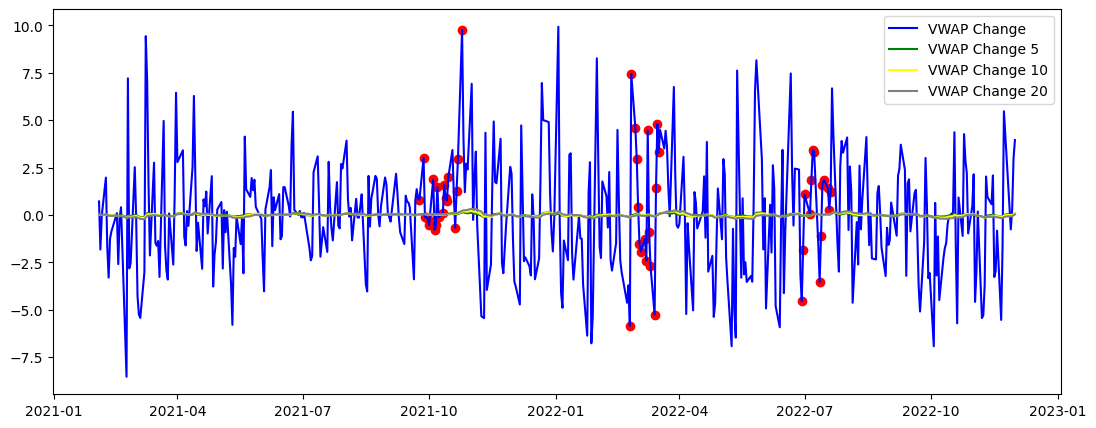

In [ ]:
plt.figure(figsize = (13,5))
plt.plot(df_abs['VWAP Change'], color = 'blue')
plt.plot(df_abs['VWAP Change 5'], color = 'green')
plt.plot(df_abs['VWAP Change 10'], color = 'yellow')
plt.plot(df_abs['VWAP Change 20'], color = 'gray')
plt.scatter(x = df_abs_YES.index,y = df_abs_YES['VWAP Change'], color = 'red')
plt.legend(['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20'])
plt.show()

In [ ]:
d_range = pd.date_range("2021-09-01", "2021-11-30")

In [ ]:
d_range

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
               '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02',
               '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10',
               '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
               '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26',
      

In [ ]:
df_abs[150:200]

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2021-09-08,1.133035,0.026536,0.044567,0.065628,NO
2021-09-09,-0.128964,0.019131,0.036539,0.060893,NO
2021-09-10,-0.913853,0.004364,0.020695,0.047888,NO
2021-09-13,-1.533125,-0.014719,-0.000791,0.029305,NO
2021-09-14,1.016729,-0.006040,0.005524,0.038633,NO
2021-09-15,0.714223,0.001965,0.009750,0.042455,NO
2021-09-16,0.651120,0.010256,0.014215,0.043236,NO
2021-09-17,0.401222,0.014495,0.015632,0.042095,NO
2021-09-20,-3.394127,-0.022358,-0.021879,0.001137,NO


In [ ]:
x = df_abs.groupby('Signal_Corrected')['VWAP Change'].mean()

x

Signal_Corrected
NO    -0.130108
YES    0.723085
Name: VWAP Change, dtype: float64

In [ ]:
cols = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20']

for c in cols:
  print(c)
  z = df_abs.groupby('Signal_Corrected')[c].mean()
  print(z)

VWAP Change
Signal_Corrected
NO    -0.130108
YES    0.723085
Name: VWAP Change, dtype: float64
VWAP Change 5
Signal_Corrected
NO    -0.002961
YES    0.009029
Name: VWAP Change 5, dtype: float64
VWAP Change 10
Signal_Corrected
NO    -0.005607
YES    0.012351
Name: VWAP Change 10, dtype: float64
VWAP Change 20
Signal_Corrected
NO    -0.009434
YES    0.013090
Name: VWAP Change 20, dtype: float64


In [ ]:
print("Median")
cols = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20']

for c in cols:
  print(c)
  z = df_abs.groupby('Signal_Corrected')[c].median()
  print(z)

Median
VWAP Change
Signal_Corrected
NO    -0.102572
YES    0.783281
Name: VWAP Change, dtype: float64
VWAP Change 5
Signal_Corrected
NO    -0.002151
YES    0.010974
Name: VWAP Change 5, dtype: float64
VWAP Change 10
Signal_Corrected
NO    -0.004223
YES    0.018567
Name: VWAP Change 10, dtype: float64
VWAP Change 20
Signal_Corrected
NO    -0.008734
YES    0.026575
Name: VWAP Change 20, dtype: float64


In [ ]:
def truncate(x):
  try:
    val = round(x, 2)
    return val
  except:
    return x

In [ ]:
columns = list(df_con_new.columns)
columns

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Changes',
 'Signal_Corrected',
 'VWAP2',
 'Rolling VWAP 5',
 'Rolling VWAP 10',
 'Rolling VWAP 20',
 'VWAP Change',
 'VWAP Change 5',
 'VWAP Change 10',
 'VWAP Change 20']

In [ ]:
columns.remove('Signal_Corrected')
columns

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Changes',
 'VWAP2',
 'Rolling VWAP 5',
 'Rolling VWAP 10',
 'Rolling VWAP 20',
 'VWAP Change',
 'VWAP Change 5',
 'VWAP Change 10',
 'VWAP Change 20']

In [ ]:
for col in columns:
  df_con_new

In [ ]:
main_df = pd.DataFrame()

for df in df_list:
  main_df = pd.concat([main_df, df])

main_df.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected
Date,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO


In [ ]:
main_df.shape

(503, 8)

In [ ]:
main_df['VWAP2'] = ((main_df['Open'] + main_df['Close'])*2+(main_df['High'] + main_df['Low']))/6.0

main_df.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664


In [ ]:
df_abs.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2021-02-03,0.715832,0.032633,0.019940,0.037481,NO
2021-02-04,-1.822292,0.014809,-0.000205,0.010332,NO
2021-02-05,-0.033335,0.008848,-0.000593,0.004544,NO
2021-02-08,1.971288,0.019510,0.017917,0.021140,NO
2021-02-09,-1.692539,-0.007591,0.000926,0.003820,NO


In [ ]:
cols = df_abs.columns
cols = list(cols)
cols

['VWAP Change',
 'VWAP Change 5',
 'VWAP Change 10',
 'VWAP Change 20',
 'Signal_Corrected']

In [ ]:
cols.remove('Signal_Corrected')
cols

['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20']

In [ ]:
X = df_abs[cols]
Y = df_abs[['Signal_Corrected']]

X.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,
2021-02-03,0.715832,0.032633,0.019940,0.037481
2021-02-04,-1.822292,0.014809,-0.000205,0.010332
2021-02-05,-0.033335,0.008848,-0.000593,0.004544
2021-02-08,1.971288,0.019510,0.017917,0.021140
2021-02-09,-1.692539,-0.007591,0.000926,0.003820


In [ ]:
Y.head()

,Signal_Corrected
Date,
2021-02-03,NO
2021-02-04,NO
2021-02-05,NO
2021-02-08,NO
2021-02-09,NO


In [ ]:
def signal_encoder(x):
  if x == 'NO':
    return 0
  else:
    return 1

Y['Signal_Corrected'] = Y['Signal_Corrected'].apply(signal_encoder)

Y.head()

<ipython-input-436-11348d9f5cdb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Signal_Corrected'] = Y['Signal_Corrected'].apply(signal_encoder)


,Signal_Corrected
Date,
2021-02-03,0
2021-02-04,0
2021-02-05,0
2021-02-08,0
2021-02-09,0


In [ ]:
main_df.head()

,Open,High,Low,Close,Adj Close,Volume,Changes,Signal_Corrected,VWAP2
Date,,,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,0.000000,NO,242.230003
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.731737,YES,243.198891
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,2.839030,NO,252.891111
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,7.944656,NO,265.529439
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,7.840299,NO,288.606664


In [ ]:
df_abs[250:300]

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2022-01-31,8.262588,0.005654,-0.055039,-0.116646,NO
2022-02-01,3.002825,0.037222,-0.013146,-0.082808,NO
2022-02-02,-1.666719,0.017592,-0.018848,-0.087217,NO
2022-02-03,-2.273627,0.001316,-0.030133,-0.096546,NO
2022-02-04,1.770202,0.016215,-0.000606,-0.069923,NO
2022-02-07,0.989051,0.009228,0.016101,-0.053197,NO
2022-02-08,-0.663733,-0.000903,0.008275,-0.053034,NO
2022-02-09,2.266554,0.025689,0.031955,-0.025850,NO
2022-02-10,-2.391311,-0.002917,0.008636,-0.042897,NO


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators= 100,
                              n_jobs = -1,
                              warm_start = True)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 24)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

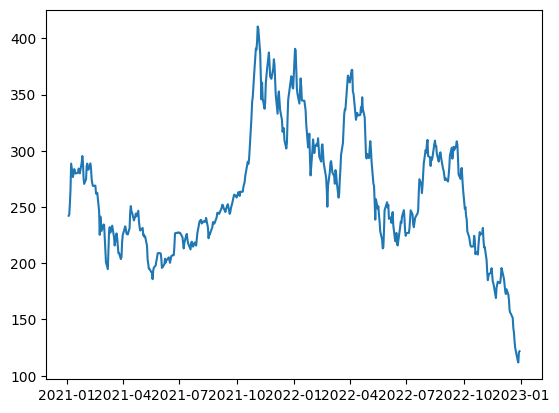

In [ ]:
plt.plot(main_df['VWAP2'])

Scaling

In [ ]:
scaler.fit(x_train)
X_scaled_train = scaler.transform(x_train)
X_scaled_test = scaler.transform(x_test)

X_scaled_train

array([[-1.64464825, -2.27385345, -1.85162657, -1.92296371],
       [-0.07747565,  1.67723648,  2.7467843 ,  3.2726811 ],
       [-0.29237339,  0.13393306,  0.36500567,  0.55781926],
       ...,
       [-0.17477591,  0.95196329,  1.91188928,  2.98879648],
       [-0.51550364,  0.39363699,  0.32803347,  0.67983552],
       [-0.99750308, -0.87582806, -1.19500916, -0.79380335]])

Min Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()

scaler_mm.fit(x_train)
X_mm_train = scaler_mm.transform(x_train)
X_mm_test = scaler_mm.transform(x_test)

In [ ]:
x_train_df_mm = pd.DataFrame(X_mm_train, columns = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20'])

x_train_df_mm.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
0,0.189937,0.094156,0.121681,0.080592
1,0.448238,0.811052,0.959019,0.980101
2,0.412818,0.531031,0.525314,0.510084
3,0.520998,0.368190,0.408962,0.366285
4,0.824072,0.842587,0.729399,0.627478


In [ ]:
x_train_df = pd.DataFrame(X_scaled_train, columns = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20'])

x_train_df.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
0,-1.644648,-2.273853,-1.851627,-1.922964
1,-0.077476,1.677236,2.746784,3.272681
2,-0.292373,0.133933,0.365006,0.557819
3,0.363978,-0.763547,-0.273962,-0.272776
4,2.202800,1.851042,1.485778,1.235900


In [ ]:
y_train.head()

,Signal_Corrected
Date,
2022-05-11,0
2021-11-02,0
2021-09-10,0
2022-07-01,1
2022-07-21,0


In [ ]:
print("Mean values")

cols = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20']

for c in cols:
  print(c)
  z = x_train_df[c].mean()
  print(z)

Mean values
VWAP Change
0.0
VWAP Change 5
2.5669896523125005e-18
VWAP Change 10
3.208737065390626e-17
VWAP Change 20
3.850484478468751e-18


In [ ]:
print("Standard Deviation")

cols = ['VWAP Change', 'VWAP Change 5', 'VWAP Change 10', 'VWAP Change 20']

for c in cols:
  print(c)
  z = x_train_df[c].std()
  print(z)

Standard Deviation
VWAP Change
1.0014482266820575
VWAP Change 5
1.0014482266820575
VWAP Change 10
1.0014482266820572
VWAP Change 20
1.0014482266820575


Min Max for Random Forest Classifier

In [ ]:
model_rf_mm = RandomForestClassifier(n_estimators = 100,
                                     n_jobs = -1,
                                     warm_start = True)

model_rf_mm.fit(x_train_df_mm, y_train)

<ipython-input-451-7c8a5b1c678c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf_mm.fit(x_train_df_mm, y_train)


RandomForestClassifier(n_jobs=-1, warm_start=True)

In [ ]:
y_pred_rf_mm = model_rf_mm.predict(X_mm_test)

cr_rf_mm = classification_report(y_test, y_pred_rf_mm)

print(cr_rf_mm)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       106
           1       1.00      0.30      0.46        10

    accuracy                           0.94       116
   macro avg       0.97      0.65      0.71       116
weighted avg       0.94      0.94      0.92       116



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
model_rf.fit(x_train_df, y_train)

y_pred = model_rf.predict(X_scaled_test)

<ipython-input-453-a24650637d33>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train_df, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_train.head()

,Signal_Corrected
Date,
2022-05-11,0
2021-11-02,0
2021-09-10,0
2022-07-01,1
2022-07-21,0


In [ ]:
from sklearn.metrics import classification_report

cr_rf = classification_report(y_test, y_pred)

print(cr_rf)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       106
           1       1.00      0.40      0.57        10

    accuracy                           0.95       116
   macro avg       0.97      0.70      0.77       116
weighted avg       0.95      0.95      0.94       116



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(n_estimators = 300, warm_start = True)
model2_mm = GradientBoostingClassifier(n_estimators = 300, warm_start = True)

In [ ]:
y_train.head()

,Signal_Corrected
Date,
2022-05-11,0
2021-11-02,0
2021-09-10,0
2022-07-01,1
2022-07-21,0


Min Max for XGBoost

In [ ]:
model2_mm.fit(X_mm_train, y_train)

y_pred2_mm = model2_mm.predict(X_mm_test)

cr_xgboost_mm = classification_report(y_test, y_pred2_mm)
print(cr_xgboost_mm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       106
           1       0.40      0.40      0.40        10

    accuracy                           0.90       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.90      0.90      0.90       116



Scaler RFC Model

In [ ]:
model2.fit(x_train_df, y_train)

y_pred2 = model2.predict(X_scaled_test)

cr_xgboost = classification_report(y_test, y_pred2)

print(cr_xgboost)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       106
           1       0.40      0.40      0.40        10

    accuracy                           0.90       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.90      0.90      0.90       116



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_train.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,
2022-05-11,-5.029441,-0.113981,-0.126969,-0.183446
2021-11-02,-0.259821,0.080219,0.179360,0.301050
2021-09-10,-0.913853,0.004364,0.020695,0.047888
2022-07-01,1.083724,-0.039748,-0.021871,-0.029566
2022-07-21,6.680095,0.088762,0.095356,0.111119


In [ ]:
x_train_mat = x_train.values

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param = {
    'kernel': ['linear', 'rbf']
}

model_SVC = SVC(C = 0.01, gamma = 'auto', kernel = 'poly', degree = 10)

model_SVC.fit(x_train_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, degree=10, gamma='auto', kernel='poly')

For Min Max SVC

In [ ]:
model_SVC_mm = SVC(C = 0.01, gamma = 'auto', kernel = 'poly', degree = 10)
model_SVC_mm.fit(X_mm_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.01, degree=10, gamma='auto', kernel='poly')

In [ ]:
y_pred_SVC_mm = model_SVC_mm.predict(X_mm_test)

cr_SVC_mm = classification_report(y_test, y_pred_SVC_mm)

print(cr_SVC_mm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       106
           1       0.00      0.00      0.00        10

    accuracy                           0.91       116
   macro avg       0.46      0.50      0.48       116
weighted avg       0.84      0.91      0.87       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cv_SVC = GridSearchCV(estimator = model_SVC, param_grid = param, n_jobs = -1)
cv_SVC.fit(x_train_df, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(C=0.01, degree=10, gamma='auto', kernel='poly'),
             n_jobs=-1, param_grid={'kernel': ['linear', 'rbf']})

In [ ]:
y_pred = model_SVC.predict(X_scaled_test)

cr_SVC = classification_report(y_test, y_pred)

print(cr_SVC)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       106
           1       0.00      0.00      0.00        10

    accuracy                           0.91       116
   macro avg       0.46      0.50      0.48       116
weighted avg       0.84      0.91      0.87       116



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [ ]:
y_pred = cv_SVC.predict(X_scaled_test)

cr_SVC_cv = classification_report(y_test, y_pred)

print(cr_SVC_cv)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       106
           1       0.00      0.00      0.00        10

    accuracy                           0.91       116
   macro avg       0.46      0.50      0.48       116
weighted avg       0.84      0.91      0.87       116



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [ ]:
y_train_d = y_train.values

Up Sampling

In [ ]:
from sklearn.utils import resample

In [ ]:
df_abs.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2021-02-03,0.715832,0.032633,0.019940,0.037481,NO
2021-02-04,-1.822292,0.014809,-0.000205,0.010332,NO
2021-02-05,-0.033335,0.008848,-0.000593,0.004544,NO
2021-02-08,1.971288,0.019510,0.017917,0.021140,NO
2021-02-09,-1.692539,-0.007591,0.000926,0.003820,NO


In [ ]:
yes_data_train = df_abs[df_abs["Signal_Corrected"] == "YES"]
no_data_train  = df_abs[df_abs["Signal_Corrected"] == "NO"]

len(yes_data_train), len(no_data_train)

(50, 412)

In [ ]:
yes_data_train_upsample = resample(yes_data_train,
             replace=True,
             n_samples=len(no_data_train),
             random_state=42)

len(X_mm_train),len(yes_data_train_upsample), len(no_data_train)

(346, 412, 412)

In [ ]:
yes_data_train_upsample.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2022-07-01,1.083724,-0.039748,-0.021871,-0.029566,YES
2022-03-08,-2.412633,-0.050280,-0.021900,-0.062579,YES
2021-10-14,0.759206,0.024519,0.034721,0.055232,YES
2022-07-08,3.334495,0.075731,0.055527,0.067116,YES
2021-10-05,-0.777778,0.002809,0.019280,0.033283,YES


Upsampling Done. Now Model Application using Random Forest along with Train Test Split

In [ ]:
df_main_abs = pd.concat([yes_data_train_upsample, no_data_train])

df_main_abs.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal_Corrected
Date,,,,,
2022-07-01,1.083724,-0.039748,-0.021871,-0.029566,YES
2022-03-08,-2.412633,-0.050280,-0.021900,-0.062579,YES
2021-10-14,0.759206,0.024519,0.034721,0.055232,YES
2022-07-08,3.334495,0.075731,0.055527,0.067116,YES
2021-10-05,-0.777778,0.002809,0.019280,0.033283,YES


In [ ]:
df_main_abs.shape

(824, 5)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_abs[['VWAP Change', 'VWAP Change 5', 'VWAP Change 10','VWAP Change 20']],
                                                                df_abs['Signal_Corrected'],
                                                                test_size = 0.25, random_state = 12)

x_train.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,
2021-11-29,2.537331,-0.000546,0.030982,0.003260
2022-07-22,4.214716,0.109098,0.129999,0.151482
2021-04-07,-1.608013,0.017272,0.041481,0.022210
2022-07-07,3.441313,0.050637,0.022388,0.033374
2021-11-08,-5.342780,-0.032364,0.033104,0.179800


In [ ]:
st_scaler = StandardScaler()

st_scaler.fit(x_train)

X_TRAIN1 = st_scaler.transform(x_train)
X_TEST1 = st_scaler.transform(x_test)

In [ ]:
y_train.head()

Date
2021-11-29     NO
2022-07-22     NO
2021-04-07     NO
2022-07-07    YES
2021-11-08     NO
Name: Signal_Corrected, dtype: object

In [ ]:
len(y_train[y_train == "YES"]), len(y_train[y_train == "NO"])

(37, 309)

In [ ]:
len(y_test[y_test == "YES"]), len(y_test[y_test == "NO"])

(13, 103)

In [ ]:
TRAIN_data = pd.DataFrame()

TRAIN_data = pd.concat([TRAIN_data, x_train])
TRAIN_data.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,
2021-11-29,2.537331,-0.000546,0.030982,0.003260
2022-07-22,4.214716,0.109098,0.129999,0.151482
2021-04-07,-1.608013,0.017272,0.041481,0.022210
2022-07-07,3.441313,0.050637,0.022388,0.033374
2021-11-08,-5.342780,-0.032364,0.033104,0.179800


In [ ]:
TRAIN_data['Signal'] = y_train

TRAIN_data.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal
Date,,,,,
2021-11-29,2.537331,-0.000546,0.030982,0.003260,NO
2022-07-22,4.214716,0.109098,0.129999,0.151482,NO
2021-04-07,-1.608013,0.017272,0.041481,0.022210,NO
2022-07-07,3.441313,0.050637,0.022388,0.033374,YES
2021-11-08,-5.342780,-0.032364,0.033104,0.179800,NO


In [ ]:
train_yes=TRAIN_data[TRAIN_data['Signal'] == 'YES']
train_no=TRAIN_data[TRAIN_data['Signal'] == 'NO']

train_yes_up = resample(train_yes,
             replace=True,
             n_samples=len(train_no),
             random_state=42)

len(train_yes_up), len(train_no)

(309, 309)

In [ ]:
full_train = pd.concat([train_yes_up, train_no])

full_train.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal
Date,,,,,
2021-10-25,9.769889,0.131404,0.174301,0.217295,YES
2021-10-12,1.607065,0.021079,0.024716,0.046379,YES
2022-03-10,-0.887321,0.002259,0.008487,-0.019740,YES
2021-09-24,0.807357,0.019430,0.018703,0.027697,YES
2021-10-08,-0.122834,0.007913,0.012333,0.035183,YES


In [ ]:
full_train.shape

(618, 5)

In [ ]:
full_train = full_train.sample(frac = 1)

full_train.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20,Signal
Date,,,,,
2022-04-27,-4.683646,-0.104565,-0.106114,-0.137978,NO
2021-09-28,-0.126248,0.033889,0.039972,0.048170,YES
2022-06-29,-4.537080,-0.048158,-0.011471,-0.032598,YES
2022-09-16,-0.866007,0.007814,0.045335,0.037861,NO
2022-06-29,-4.537080,-0.048158,-0.011471,-0.032598,YES


In [ ]:
full_train.shape

(618, 5)

In [ ]:
x_train, y_train = full_train[['VWAP Change', 'VWAP Change 5',
                               'VWAP Change 10', 'VWAP Change 20']], full_train['Signal']

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 100,
                                  n_jobs = -1,
                                  warm_start = True)

model_rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, warm_start=True)

In [ ]:
y_pred_rf = model_rf.predict(x_test)
cr_rf_up = classification_report(y_test, y_pred_rf)
print(cr_rf_up)

              precision    recall  f1-score   support

          NO       0.91      0.93      0.92       103
         YES       0.30      0.23      0.26        13

    accuracy                           0.85       116
   macro avg       0.60      0.58      0.59       116
weighted avg       0.84      0.85      0.84       116



In [ ]:
xg_boost = GradientBoostingClassifier(n_estimators = 100, warm_start = True)

xg_boost.fit(x_train, y_train)

GradientBoostingClassifier(warm_start=True)

In [ ]:
y_pred_xg = xg_boost.predict(x_test)

cr_xg_up = classification_report(y_test, y_pred_xg)
print(cr_xg_up)

              precision    recall  f1-score   support

          NO       0.92      0.89      0.91       103
         YES       0.31      0.38      0.34        13

    accuracy                           0.84       116
   macro avg       0.62      0.64      0.63       116
weighted avg       0.85      0.84      0.84       116



In [ ]:
model_SVC = SVC(C = 0.1)

model_SVC.fit(x_train, y_train)

SVC(C=0.1)

In [ ]:
y_pred_svc = model_SVC.predict(x_test)

cr_svc = classification_report(y_test, y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

          NO       0.96      0.43      0.59       103
         YES       0.16      0.85      0.27        13

    accuracy                           0.47       116
   macro avg       0.56      0.64      0.43       116
weighted avg       0.87      0.47      0.55       116



In [ ]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(hidden_layer_sizes = (100,50,),
                          activation = 'relu',
                          solver = 'adam',
                          alpha = 0.001,
                          max_iter = 30)

In [ ]:
model_mlp.fit(X_TRAIN1, y_train_up)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=30)

In [ ]:
y_pred_mlp = model_mlp.predict(X_TEST1)

cr_mlp = classification_report(y_test_up, y_pred_mlp)

print(cr_mlp)

              precision    recall  f1-score   support

          NO       0.83      0.61      0.70       101
         YES       0.70      0.88      0.78       105

    accuracy                           0.75       206
   macro avg       0.76      0.75      0.74       206
weighted avg       0.76      0.75      0.74       206



MIN MAX Scaler for MLP

In [ ]:
X_mm_train.shape
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
model_mlp_mm = MLPClassifier(hidden_layer_sizes = (30,30),
                          activation = 'relu',
                          solver = 'adam',
                          alpha = 0.001,
                             learning_rate='adaptive', learning_rate_init=0.0001,
                             n_iter_no_change=15,tol=.0001,
                             batch_size=20,
                          max_iter = 500)
cols=2
model_mlp_mm.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, batch_size=20, hidden_layer_sizes=(30, 30),
              learning_rate='adaptive', learning_rate_init=0.0001, max_iter=500,
              n_iter_no_change=15)

In [ ]:
y_pred_mlp_mm = model_mlp_mm.predict(x_test)

cr_mlp_mm = classification_report(y_test, y_pred_mlp_mm)

print(cr_mlp_mm)

              precision    recall  f1-score   support

          NO       0.92      0.59      0.72       103
         YES       0.16      0.62      0.25        13

    accuracy                           0.59       116
   macro avg       0.54      0.60      0.49       116
weighted avg       0.84      0.59      0.67       116



In [ ]:
model_mlp.fit(x_train_df, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=30)

In [ ]:
y_pred = model_mlp.predict(X_scaled_test)

cr_mlp = classification_report(y_test, y_pred)

print(cr_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       106
           1       0.00      0.00      0.00        10

    accuracy                           0.91       116
   macro avg       0.46      0.50      0.48       116
weighted avg       0.84      0.91      0.87       116



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X.head()

,VWAP Change,VWAP Change 5,VWAP Change 10,VWAP Change 20
Date,,,,
2021-02-03,0.715832,0.032633,0.019940,0.037481
2021-02-04,-1.822292,0.014809,-0.000205,0.010332
2021-02-05,-0.033335,0.008848,-0.000593,0.004544
2021-02-08,1.971288,0.019510,0.017917,0.021140
2021-02-09,-1.692539,-0.007591,0.000926,0.003820


In [ ]:
X.shape

(462, 4)